In [1]:
import numpy as np
import tensorflow as tf
from preprocess import *
import ipdb

music21: Certain music21 functions might need the optional package scipy;
                  if you run into errors, install it by following the instructions at
                  http://mit.edu/music21/doc/installing/installAdditional.html


Contains special words for the dictionary

In [2]:
special_words = ["<PAD>", "<GO>", "<END>"]

## Class For Dictionary
The class contains the data and the helper functions for the dictionary to train seq2seq model.
Most important functions are to mapping a list of words(a sentence) to a list of corresponding integer(indeces of words). 

In [3]:
class Seq2Seq_Dictionary:
    def __init__(self, sentences ):
        self.word2index_map = dict()
        self.index2word_map = dict()
        self.vocab_size = 0
        self.init_register(sentences)
        
    # Initiates word2index_map and index2word_map
    # Also extracts the max number of words in the sentences and saves it 
    def init_register(self,sentences):
        global special_words
        current_index = 0
        ## save the maximum length among the sentences. 
        self.max_length = max([len(sentence) for sentence in sentences])
        ### map special words, initially the mappings are empty.
        for word in special_words:
            self.word2index_map[word] = current_index
            self.index2word_map[current_index] = word
            current_index+=1
        
        s = set([item for sublist in sentences for item in sublist])
        self.word2index_map.update({e:i+current_index for i,e in enumerate(s)})
        self.index2word_map.update({v:k for k,v in self.word2index_map.items()})
        self.vocab_size = len(self.index2word_map)
    
    ## Returns the index of the word in the dictionary. It is assumed that the word
    ## will be always in dictionary.
    def get_index(self, word):
        return self.word2index_map[word]
    
    ## Maps a sentence, which is a list of words, to the corresponding list of integers.
    ## Each word is looked up from the map of the dictionary, and as in get_index method,
    ## it is assumed that the word will always be found in the dictionary
    def map_sentence(self, sentence):
        return [self.get_index(i) if i in self.word2index_map else 0 for i in sentence]
    
    ## Returns the word by its index in dictionary.
    def get_word(self, index):
        return self.index2word_map[word]
    
    ## Pads the list of words to <PAD> at the end of the list of words in sentence
    def pad_sentence(self, sentence):
        return  sentence + ["<PAD>"] * (self.max_length - len(sentence)+2)
    
    ## Adds <GO> and <END> to the start and end of the sentence
    def add_start_end_tokens(self, sentence):
        return ["<GO>"] + sentence + ["<END>"]
    
    ## Transforms the sentence in a format suitable for the Neural Network
    def transform_sentence(self, sentence):
        s = self.add_start_end_tokens(sentence)
        s = self.pad_sentence(s)
        s = self.map_sentence(s)
        return s
    
    def reverse_transform(self, sentence):
        return [self.index2word_map[s] for s in sentence if (not self.index2word_map[s] in special_words and s in self.index2word_map)]
    
    ### Reverse operation of map_sentence. Gets the sentence, list of integers, as input and
    ### maps each entry from index to word
    #def decode_indeces(self,sentence_with_index):
    #    sentence_list = list()

#### Create the dictionary

In [4]:
data, targets = get_data_from_dir("test_midi/")

Working on test_midi/its_my_life.mid
No lyrics in test_midi/its_my_life.mid
Working on test_midi/La_Isla_Bonita.mid
Not adding [] and [b'Como ', b'puede ', b'ese ', b'olvidar ']
Working on test_midi/Dangerous.mid
Working on test_midi/never_gonna_say_im_sorry.mid
Not adding [] and [b"I'm ", b'al', b'ways ', b'here ', b'like ', b'a ', b'sun, ', b"I'm ", b'al', b'ways ', b'here ']
Working on test_midi/Any_Colour_You_Like.mid
No lyrics in test_midi/Any_Colour_You_Like.mid
Working on test_midi/The_Big_L.mid
Not adding [] and [b'Ya ', b'know ', b'what ', b"I'm ", b'saying... ']
Not adding [] and [b'Big ', b'love. ']
Not adding [] and [b'Building ', b'the ', b'big_love. ']
Not adding [] and [b"I'm ", b'making.. ']
Not adding [] and [b'The_big ', b'love.. ']
Working on test_midi/Hallo hallo.mid
Working on test_midi/Coulda woulda shoulda - Celine Dion.mid
Working on test_midi/dont_ask_me_why.mid
Not adding ['4.7.11', '4.7.11', '10.11', 'C2', 'B-4', 'B-4', '11.0.4.7', 'B-4', '10.2', '10.2', '7.1

Not adding ['F#2', '9.10', '6.8', 'A4', 'C2', '3.6.9', 'F#2', 'C#3', '9.10.1', '6.9', '4.6.9', 'C#2', 'C2', 'F#2', '4.9.10', '6.9', 'C#2', 'A1', '0.3.6.9', 'F#2', '8.1', '9.10.1', '6.9', '0.6', '1.4.6.9', 'F#1', 'F#2', 'F#2', '9.10', '6.9', '0.6', '3.6.9', 'F#2', 'F#2', '6.9.10.1', '6.9', '0.6', '4.6.9', 'F#2', 'F#2', '4.9.10', '6.9', 'F#1', '0.6', '3.6.9', 'F#2', '6', '6.9.10.1', '6.9', '0.6', '4.6.9', 'B1', 'F#2', 'F#2', '9.10', '6.9', '0.6', '3.6.9', 'F#2', 'F#2', '9.10.11.1', '6.9', '6.11.0', '4.6.9', 'F#2', 'F#2', '4.9.10', '6.9', 'B1', 'F#1', '0.3.6.9', 'F#2', '6.11', '9.10.1', '6.9', '0.6', 'E4', 'F#1', 'C#5', 'F#2', 'C#4', 'F#4', '0.6', '6.11', '1.6', '0.6', 'E4', 'C#4', 'F#2', 'E4', 'F#4', 'F#1', '0.1.6', '6', '1.6', '11.0', 'E4', 'B1', 'B2', 'D4', 'F#4', '11.0', '11.2', '11.1', '11.0', 'E4', 'D4', 'B2', 'E4', 'F#4', 'B1', '11.2', 'C2'] and [b'des', b'ti', b'ny ', b'has ', b'a ', b'fun', b'ny ', b'way ', b'when ', b'it ']
Not adding ['6.9', '0.1', '4.6.9', '8.11.1', 'C#2', 'F#

Not adding [] and [b"{can't ", b'let ', b'go} ']
Not adding [] and [b"{can't ", b'let ', b'go} ']
Not adding [] and [b'{flower} ', b'Oo', b'oh ']
Not adding [] and [b'Oo', b'ah', b'ah', b'ah', b'ha', b'ah ']
Not adding [] and [b'{Eve', b'ry ', b'time ', b'you ', b'leave ', b'the_room} ']
Not adding [] and [b'I ', b'feel ', b"I'm ", b'fa', b'ding ', b'like ', b'a ', b'flo', b'wer ']
Not adding [] and [b'{Every ', b'time ', b'I ', b'see ', b'you} ']
Not adding [] and [b'Oh, ', b'fa', b'ding ', b'like ', b'a ', b'rose ']
Not adding [] and [b'{Eve', b'ry ', b'time ', b'you ', b'leave ', b'the_room} ']
Working on test_midi/Temptation_Waits.mid
Working on test_midi/Belive.mid
Working on test_midi/November_Rain.mid
Not adding [] and [b'oh', b'yeah ']
Working on test_midi/takeabow.mid
Not adding [] and [b"[You'd ", b'break, ', b"you'd ", b'break, ', b"you'd ", b'break] ']
Not adding [] and [b"[I've ", b'al', b'ways ', b'been ', b'in ', b'love ', b'with ', b'you] ']
Working on test_midi/Califor

Working on test_midi/Can't feel my face - The Weeknd.mid
Not adding [] and [b'All', b' rights', b' reserved ']
Working on test_midi/quit_playing_games.mid
'utf-8' codec can't decode byte 0xb4 in position 3: invalid start byte
Could not add [b'So ', b'what ', b'is ', b'it ', b'that ', b'you ', b'can\xb4t ', b'see.']
'utf-8' codec can't decode byte 0xb4 in position 3: invalid start byte
Could not add [b'Don\xb4t ', b'leave ', b'me ', b'han', b'ging ', b'here ', b'for', b'e', b'ver.']
'utf-8' codec can't decode byte 0xb4 in position 3: invalid start byte
Could not add [b'Let\xb4s ', b'stop ', b'this ', b'to', b'night.']
Working on test_midi/sleeping_in_my_car.mid
'utf-8' codec can't decode byte 0x85 in position 3: invalid start byte
Could not add [b'Ah, ', b'sleep', b"in' ", b'in ', b'my ', b'car\x85 ']
'utf-8' codec can't decode byte 0x85 in position 3: invalid start byte
Could not add [b'Sleep', b"in' ", b'in ', b'my ', b'car\x85 ']
Working on test_midi/waterfall.mid
Not adding [] and [

Not adding ['6.7.9.0.2.3', '4', 'E1', '4.7.11', '4.7.11', '11.1.4.6', '6', '6', '6', '4.6', '6', 'C3', '6', '6', '4.6', '6', '6', '6', '4.6', '6', 'C3', '6', '6', '4.6', '6', '6', '6', '4.6', '6', 'C3', '6', '6', '4.6', '6', '6', '6', '4.6', '6', 'C3', '6', '6', '4.6', '6', '6', '6', '4.6', 'C3', '6', '6', '6', '4.6', '6', '6', '6', '4.6', 'C3', '6', '6', '6', '4.6', '6', '6', '6', '4.6.7', 'C3', '6.7.9', '0.2.6', '2.4.6', '4.6.7', '6.7.9', '0.2.6', '2.4.6', 'C3', '4.6.7', '6.7.9', '0.2.6', '2.4.6', '4.6.7', '6.7.9', '0.2.6', '2.4.6', 'C3', '4.6.7', '6.7.9', '0.2.6', '2.4.6', '4.6.7', '6.7.9', '0.2.6', 'C4', '2.4.6', 'C3', '4.6.7', '6.7.9', '0.2.6', '2.4.6', '4.6.7', '6.7.9', '0.2.6', '2.4.6', 'C3', '4.6.7', '6.7.9', '0.2.6', '2.4.6', '4.6.7', '6.7.9', '0.2.6', 'C3', '2.4.6', '4.6.7', '6.7.9', '0.2.6', '2.4.6', '4.6.7', '6.7.9', '0.2.6', 'C3', '2.4.6', '4.6.7', '6.7.9', '0.2.6', '2.4.6', '4.6.7', '6.7.9', '0.2.6', 'C3', '2.4.6', '4.6.7', '6.7.9', '0.2.6', '2.4.6', '4.6.7', '6.7.9', 'C3

Not adding ['2.6.7', '0.2.6', '4.6', '6.7.9', '9.0.1.2.5', '2.6.7', '4.7.10', '0.2.6', '4.6', '11.3.6', '4.6.7', 'C2', '6.7.9', '8.1', '0.2.6', '2.4.6', '4.6.7', '0.1.2.3.4.5.6.7.9', '10.11.0.1.2.3.4.5.6.7', '11.0.1.2.3.4.5.6.7', '0.1.2.3.4.5.6', '0.1.2.3.4.5.6', '0.1.2.3.4.5.6', '0.1.2.3.4.5.6', '10.11.0.1.2.3.4.5.6.7', '0.1.2.3.4.5.6.7.9', '0.1.2.3.4.5.6.9', '10.11.0.1.2.3.4.5.6', '11.0.1.2.3.4.5', '10.11.0.1.2.3.4.5.6', '10.11.0.1.2.3.4.5', '11.0.1.2.3.4.5', '0.1.2.3.4.5', '10.0.1.2.3.4.5.6', '0.1.2.3.4.5', '0.2.4.5', '10.2.4.5', '0.1.2.4', '0.1.2.4', '10.0.2.4.5', '10.2.4.5', '0.1.2.4', '0.1.2.4', '10.0.2.4.5', '10.0.2.4.5', '0.1.2.4', '0.1.2.4', '10.0.2.4.5', '10.2.4.5', '0.1.2.4', '0.1.2.4', '10.0.2.4.5', '10.2.4.5', '0.1.2.4', '0.1.2.4', '10.0.2.4.5', '0.1.2.4', '0.4.5', '0.2.4', '10.0.1.2.4', '0.2.4.5', '0.4.5', '10.0.1.2.4', '0.2.4.5', '10.0.2.4.5', '10.0.1.2.4', '0.2.4.5', '10.0.2.4.5', '10.0.1.2', '0.2.4.5', '10.0.2.4.5', '10.0.1.2', '0.2.4.5', '10.2.4.5', '0.1.2.4', '0.1.2.

Not adding ['F#3', '0.6', 'C2', '1.4.6.9', 'B-2', 'F#3', '4.9', '6.9', '0.4', '0.6', '0.6', '6.9.1', '0.6', '1.4.6.9', 'B-2', 'C#4', '6.9.1', 'C2', '6.8.9', '6.9', '1.6', '9.1.4', '4.9', '0.6', 'A2', '0.1.4.6', '9.0', '4.9', 'B-2', '2.4.9', 'F#2', '9.0.4', '6.9.0', '11.1', '9.1.4', '11.1', '0.6', 'C#4', '9.0.4', '9.10.11.0.1.4', '6.9.11', 'A2', '9.10.11.4', 'A3', '9.11.1', '4', '4.8.11', '0.4', '0.6', 'E2', 'E3', '4.6.8.11.0', '8.0', '4.8.9.11', 'B-2', '4.8.9.11', '6.9', '0.2.4', '0.4.6', '4.8.11', '11.4', '0.6', '11.0.4', '8.9.11.2.4', 'G3', '9.10.11.4', '4.8.11', '4.8.11.0', '6.8', 'F#2', '11.0.4', '6.9.1', 'F#3', '0.4.6', '6', '6.9.0.1', 'C#3', '1.4.6.9', 'B-2', '11.1.6', '1.2.6', '11.1', 'E4', '0.1.2.4', '0.6', 'F#1', '6.9.1', 'C2', '11.1.4.6', '4.6.9.0', '4.6.9.0', '4.6.9.10.11', '4.8.9.11', '4.6.8.9.10.11.1', '6.7.9.0', '4.5.6.9.10', '4.6', 'C2', 'F#3', '6', '6', '1.6', '0.6', '6.9.1', '0.6', '6.9.1', 'C2', '0.1', '6.9.1', 'B-2', 'E2', '6.9.1', '6.7.11.2', '0.1.4', '0.6', '6.9.1'

Not adding ['11.2', 'E-3', 'E-3', 'E-3', '3', 'E-3', 'E-3', 'E-3', 'E-3', 'E-3', 'B4', 'E-3', 'E-3', 'E-3', 'E-3', '3', '3', '3', '3', '11.1', '3', '3', 'E-3', 'E-3', 'E-3', 'E-3', 'E-3', 'E-3', '11', '2.6', 'B3', '2.6', 'B3', '2.6', 'B3', '2.6', 'B3', 'F2', '5.9', 'F1', 'B3', '5.9', 'C4', '2.5.9', 'C4', '5.9.11', 'B-1', 'B-2', '10.2.5', 'D4', '5.10', 'D4', '2', '10.2', 'B-4', 'D4', '10.0.2', '5.10', 'C4', 'F4', 'A1', 'A2', 'A4', 'C4', '5.9', 'C4', 'C4', '5.9.0', 'C4', '9.0', 'A2', '4.9', 'C4', '5.7.0', 'C4', 'A3', '2.5.7.10', 'A1', 'G1', '7', '2.5.7.10', '7', '2.5.7.10', '7', 'G3', 'G1', 'G2', '10.2.5', '7.10.2', '5.7', '10.2', '7', 'C2', '0.4', '7.0', '10.0.4', '7.0', 'C3', '10.0', '0.4', '7.0', '7.0', '10.0.4', 'C2', 'D2', 'D2', 'D4', 'G4', '2.5.7.10', 'G1', 'D4', 'G4', '7', '5.7.10', 'D4', '7', '10.2.5', 'G3', '7', 'D4', 'B-3', '2.5.7.10', 'G2', 'D4', 'B-3', '7.10', 'C2', '10.0.4', 'C2', '7.0', '10.0.2.4', '7.0', '10.0.2.4', 'C2', '7.0', '0.5', '7.10', '0.5', 'C3', '4.5.9.0', '5.7'

Working on test_midi/When_I_Grow_Up.mid
Not adding [] and [b'Pa ', b'pa', b'pa', b'pa ']
Not adding [] and [b'La ', b'pa', b'pa', b'pa ']
Not adding [] and [b'La ', b'pa', b'pa', b'pa ']
Not adding [] and [b'Ra ', b'pa', b'pa', b'pa', b'ah ']
Not adding [] and [b'Pa ', b'pa', b'pa', b'pa ']
Not adding [] and [b'La ', b'pa', b'pa', b'pa ']
Not adding [] and [b'La ', b'pa', b'pa', b'pa ']
Not adding [] and [b'Ra ', b'pa', b'pa', b'pa', b'ah ']
Not adding [] and [b'Pa ', b'pa', b'pa', b'pa ']
Not adding [] and [b'La ', b'pa', b'pa', b'pa ']
Not adding [] and [b'La ', b'pa', b'pa', b'pa ']
Not adding [] and [b'Ra ', b'pa', b'pa', b'pa', b'ah ']
Not adding [] and [b'Pa ', b'pa', b'pa', b'pa ']
Not adding [] and [b'La ', b'pa', b'pa', b'pa ']
Not adding [] and [b'La ', b'pa', b'pa', b'pa ']
Not adding [] and [b'Ra ', b'pa', b'pa', b'pa', b'ah ']
Not adding [] and [b'{Shred ', b'la', b'la', b'la ', b'la ', b'la', b'la', b'la ', b'Shred} ']
Not adding [] and [b'{Shred ', b'la', b'la', b'la ', 

Not adding ['E-3', '0.3', '0.4', 'E2', 'E2', '4.5', '4.5', 'E2', '9', '3', '0.3', '3', 'B1', '3', '3', '0.3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', 'C2', '3', '11.3', '3', 'C2', '3', '3', '11.3', '3', '0.3', '3', '11.3', '3', '3', '0.3', '3', '3', '3', 'A2', '3', '3', '3', '3', '3', '3.9', '3', '3', '3', '3', '3', '3', '3', '3', '0.3', '3', '3', '11.3', '3', '0.3', '3', 'B1', '3', '3', '0.3', '3', '11.3', '3', '3', 'D2', '3', '3', '3', 'D2', '3', '3', '3', 'D2', '3', '3', '3', 'D2', '3', '3', 'D2', 'D2', 'D2', '11.0.2.4', 'D4', 'B6', 'C5', 'G4', 'C5', 'D4', 'B-4', '7.0', 'E3', 'C2', 'C4', 'C3', 'E5', 'E5', 'E5', 'E5', 'E5', 'A3', 'A2', 'A2', 'C5', 'A2', 'C3', 'E3', 'G4', 'A2', 'F2', 'F3', 'F3', 'C5', 'C5', 'C5', 'A4'] and [b'\n', b'Mom', b'ma ', b'loves ', b'her ', b'ba', b'by, ', b'and ', b'daddy ', b'loves ', b'you ', b'too. ']
Not adding ['4', '9.1', '2', 'D2', 'F#2', 'F#2', 'F#2', 'F#2', '5', 'C2', 'F#2', 'F#2', 'F#2', '4', 'D2', 'F#2', 'C2', '0.6', '2', 'C2', 'F#2

Not adding ['2', 'G3', 'C2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '7.0', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '7.0', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '0.4.6', '2', 'D2', 'D2', '2', '0.2', 'C2', 'D2', '0', '0', '0', '10.0.3', 'B-1', '10.3', 'C2', '10', 'B-1', '10', 'B-2', '9.10', 'A1', '9.10', '9.0', '7.9', 'G3', '9', '0', '7.0', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', 'G1', '7.0', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', 'G1', '7.0.1', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', 'G1', '7.0', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '9.0', 'F#2', 'F#2', '6.9', '6.9', '9.0', '6.9', '9', '9', '9.0', '9', '9', '9', '9', '9', 'C2', '9', '7', '7', '9', '9.0', 'F#2', '6.9', '6.9', '6.9', '9.0', '6.9', '7.9', '9', 'A2'] and [b'\n', b'(when ', b'when) ']
Not adding ['F#2', '0', 'F#2', 'C3', 'F#2', '0.6', '0.6', '0.6', '0.6', '0', '0.6', '0'

Not adding ['2.5.6', '2.6', '5.6.9.0', '2.5.9', 'A1', '2.5', 'F#2', '2.5', '9.0.2.4.5.6', '2.5.9', 'C2', '9.0.4', '2.5', 'B-2', '2.5', '9.2', 'G4', 'G1', '6.7.11.2', '11.0.1.2.6.7', 'G3', 'G4', '11.2', '11.2', '6.7.11.2', '7.11.2', '11.0.2.4.6.7', 'B4', 'D4', 'B4', '6.7.11', '6.7', '2.7', '2.7', 'B4', '11.0.2.6.7', '0.2.6.7', '7.11', '6.7.11', '2.6', '7.10.2', '7.11', 'G4', '0.2.4.6.7', '6.7.11.2', 'B4', '7.10.11.2', '7.11.2', 'G4', '11.2', '11.2.6', '7.11.0.2', 'G1', 'G4', '11.2', '11.2', '6.7.11.2', '7.11.2', '11.0.2.4.6.7', 'D4', 'B4', '6.7.11', '6.7', '3.7', '3.7', 'B4', '11.0.2.6.7', '0.2.6.7', '7.11', '3.7.11', '7.11', '2.6', 'G4', '7.11', '6.7.11.2', '0.2.4.6.7', 'B4', '7.11.2', '7.10.11.2', '11.2', 'G4', 'B4', 'G3', 'D4', 'G4', '11.2.6', '7.11.0.2', 'G1', '7', '11.2', '6.7.11.2', '11.2', '7.11.2', '11.0.2.4.6.7', 'B4', 'D4', 'B4', '6.7.11', '6.7', 'E-4', 'G4', 'B4', '0.2.6.7', '7.11.2', '7.11', '11.2.3', '6.7.11', '2.6', '7.11', '3.7', '11.0.2.4.6.7', '6.7.11.2', 'B4', '7.10.11

Not adding ['11.0.2.4.7', '7.11.2', '2.7', '7.9.10.11.2', 'C5', 'C2', 'G4', '7.11.2', 'B-2', '7.11.2', '7.10.11.2', 'D2', '7.10.11.2', 'E2', '7.11.2', 'B-2', '7.11.2', '7.10.11.2', '7.11.2', 'C5', 'B-2', '7.11.2', '7.10.11.2', '11.0', '4.7.9.10.0', 'C5', 'C2', '0.4.7', 'B-2', '0.4.7', '4.7.10.0', '9.2', 'G#4', '4.7.9.10.0', 'E2', '0.4.7', 'A4', 'B-2', '0.4.7', '4.7.10.0', 'C2', 'A4', '11.0.2.4.7', 'B-2', '0.4.7', '0.4.7', 'B-2', '0.4.7', '7.9.10.11.2', '0', 'B3', '7.11.2', '10.2', '7.11.2', '7.10.11.2', 'D3', 'D2', '7.10.11.2', 'E2', '7.11.2', 'B-2', '7.11.2', '7.10.11.2', '7.11.2', 'B-2', '7.11.2', '7.10.11.2', 'C3', 'B2', '4.7.9.10.0', 'C3', 'C2', '4.7.10.0', '0.4.7', 'B-2', '0.4.7', 'C3', 'D2', '4.7.9.10.0', 'C2', '0.4.7', 'C3', 'B-2', '0.4.7', '4.7.10.0', 'C2', '0.2.4.7.9', 'B-2', '0.2.4.7', '0.4.7', 'B-2', '0.2.4.7', '7.9.10.11.2', 'A4', 'C2', '7.11.2', 'B-2', '7.11.2', '7.10.11.2', 'D2', '7.10.11.2', 'A4', 'E2', '7.11.2', 'B-2', '7.11.2', '7.10.11.2', '7.11.2', 'A4', '10.1', '7.1

Not adding ['E3', 'G#2', '9.0.4', 'E1', '4', '8.0', 'C#3', 'G#2', '4.8', 'G#2', '8.0', 'G#2', '4.8', 'G#2', 'E6', 'E1', '8.0', '8.9', '11', '2.4.8', '4.8', '7.8.0', '7.8', '5.7', '4.8', '8.9', 'E2', '0.5', '9', 'G#2', '4.7.11', 'E1', '7', '0.1', 'F3', 'E2', '4.5', 'D2', 'F3', 'E2', '0.5', 'D2', 'F3', 'E2', '4.5', 'D2', 'F3', 'E2', '9', '0.5', 'D2', 'F3', 'E2', '4.5', 'D2', 'F3', '5.7.0', 'G2', 'F#2', '0.5', 'E2', '4.5', 'C2', 'D5', 'D2', '2.5', 'D5', 'E1', '11.2', '0.1', '11.2', '11.2.4.5', '11.2.4', '11.4', '4.5.7', 'E5', '11.2', 'F3', '11.2.4', '11.4', '5.7.0', '4.5.7', '11.2', '11.4', '11.2', '11.4', '4.5.7', '4.7', '4.5.7', '11.2', '4.7', 'E2', '0.4.5.7', '5.7.0', '4', 'D2', 'F3', '4.5.7', 'E2', '4.5.7', 'E5', 'D2', 'F3', '4.7', '0.5', 'G2', 'F#2', '0.5', 'E2', '4.5.7', 'C2', 'A4', '5.7', '11.2', 'D5', 'E1', '0.1.2', 'E5', '4.5.7', '2.4', '4.5.7', '2.4', '2.4.5', '2', '0.2.4.5.7', '2.4', 'E5', '2.4', '2.5', '2.4.5.7', '2.4', '2.4', '2.5', '2.4', '0.2.5', '2.4.5', 'E2', '4.5', '11.2

Working on test_midi/Time.mid
Not adding [] and [b'{Aah} ']
Working on test_midi/Call_of_The_Wild.mid
Not adding [] and [b'{And_there ', b'is_something ', b'that ', b'sweeps ', b'the ', b'dark} ']
Not adding [] and [b'{a ', b'lo', b"ver's ", b'dart, ', b'the ', b'call ', b'of_a_bro', b'ken_heart.} ']
Not adding [] and [b'{And_there ', b'is_something ', b'that ', b'sweeps ', b'the ', b'dark} ']
Not adding [] and [b'{a ', b'lo', b"ver's ", b'dart, ', b'the ', b'call ', b'of_a_bro', b'ken_heart.} ']
Not adding [] and [b'{And_there ', b'is_something ', b'that ', b'sweeps ', b'the ', b'dark} ']
Not adding [] and [b'{a ', b'lo', b"ver's ", b'dart, ', b'the ', b'call ', b'of_a_bro', b'ken_heart.} ']
Not adding [] and [b'Ah', b'ah', b'ah ', b'ah', b'ah', b'ah ']
Not adding [] and [b'Ah', b'ah', b'ah ', b'ah', b'ah', b'ah ']
Not adding [] and [b'Ah', b'ah', b'ah ', b'ah', b'ah', b'ah ']
Not adding [] and [b'Ah', b'ah', b'ah ', b'ah', b'ah', b'ah ']
Not adding [] and [b'Ah', b'ah', b'ah ', b'ah'

Working on test_midi/mirror_mirror.mid
Working on test_midi/Beautiful_Things.mid
Not adding [] and [b'oh', b'oh', b'oh ']
Working on test_midi/take_the_long_way_home.mid
Not adding ['0', '0', 'B-2', 'C2', 'C1', '0', '0', '0', '0', 'C1', '0', '0', '0', 'C2', '0', 'C2', 'C1', '0', '0', '0', 'C2', '10.0', 'C1', 'B-5', '0', '0', '0', '0', 'C1', '0', '0', '0', '0', '0', 'C1', '0', '0', '0', '0', '6.7.10.0.3', '10.0.3.6', '7', '7.10.0.3', '7.10.0.3', '10.0.2', '10.0.2.5', '6.7.10.0.2', '5.6.9.0', '7', '5.9.0', '5.6.7.9.0', '0.4.5.6.7', '0.4.5', '0.4.7', '0.4.7', '9.10.0.2.4.5', '4.5.7.9.10.0', '4.5.7.10.0', '4.5.7.10.0', '5.7.10.0', '4.5.7.10.0', '10.0.2.3.4.5.7', '0.2.4.5.7', '4.7.9.0', '0.4.7', '0.4.7', '0.4.7', '4.7.9.0', '4.6.7.9.0', '6.7.10.0.3', '6.7.10.0.3', '7.0', '7.10.0.3', '6.7.10.0.3', '6.7.10.0.2', '7.0', '10.0.2.5.7', '0.6', '5.6.7.10.0.2', '5.6.7.9.10.0', '5.9.0', '6.7.10.0', '6.7', '5.6.7.9.10.0', '4.5.6.7.10.0', '0.4.5.6.7', 'C3', '4.7.9.0', '0.4.6.7', '10.0.2.4.5.7', 'C2', 

Not adding [] and [b'{ah', b'ah', b'ah', b'ah} ']
Not adding [] and [b'Wow! ']
Not adding [] and [b'{ah', b'ah', b'ah', b'ah} ']
Working on test_midi/Dream_On.mid
Working on test_midi/Sacrifice.mid
Not adding ['6.9.11.1', '6.8.9.11', '1.5.8', '5.8', '6.9', '5.6.8.9.11', '6.9.10.1', '6.8.9', '3.5', 'C4', '0.3.5.8', '6.9.11', '6.9', '6.8.9.11.0', '6.8.9.10.1', '5.6.9', '1.6', 'B-3', '10.1.3', '6.9.11', '6.9', '6.9.11.1', '6.9.10.1', '6.9.10.1', '6.9.11', '6.9.11.1', 'F#2', '6.8.9', '3.6.9.10.11', '6.9.11.2', '8.1', '6.7.9.10.11.1', '5.6.9.11', '6.8.9.11', 'C#2', '5.8', '5.6.8.9.1', '5.6.8.9.1', '5.6.8.9.11.1', 'C#2', '9.10.1.3.6', '6.9.10.1', 'C#5', '6.9.11', 'F#1', '6.10.1', '6.9.10.1', '6.9.10.1', '6.9.10.11.1', '5.6.9.10.1', '6.9.10.1.2', '2.3.6', '1.3', '3.6.10', '6.9.11', '3.6.9.10', '3.6.9.10', 'B-5', '3.6.9', '3.6.9.10.11', '6.9.10', '6.9.10.1', 'G#2', '8.0.3', '6.9.11', '0.3.6.8.9', '0.3.6.8.9', '6.8.9.11', '3.6.8.9.11.0', '6.8.9', '6.8.9.10.11.1', 'C#2', '1.5.8', '6.9.11', '5.6.

Working on test_midi/new_years_day.mid
Not adding ['0.1.3.6', '3', '1.3.6', '0.1.3.4.6', '0.1.3.6.8', '1.3.6', '1.4.6', '0.1.3.6', '0.1.3.6', '0.1.3.6', '1.3.4.6', '1.3.6', '6.8.0.1', 'G#2', '0.1.2.3.6.7.8', '11.1.3.4.6.8', '0.2.3.6.7.8', 'G#2', '3.8', '0.3.6.8', '11.0.1.2.3.4.5.6.7.8', '0.3.6.8', '3', '11.0.1.2.3.4.5.6.7', '11.0.1.6', 'B1', 'E-5', '0.3.4.6', 'B1', '6.11.0', '11', '11.0.1.4.6', '11', 'B-4', '6.11.0', '10.3', '0.1.3.6', '10.3', '3.4.6', '0.3.6', '0.6', '0.3.4.6', '0.3.6.7.8', '0.3.6', '0.3.4.6', 'E-2', '0.3.6', '3.4.6', 'G#2', '6.8.0', '4.6.8.11.0', 'G#2', '6.8.11.0', '6.8.0', '4.6.8', '0.1.4.6.8', '3', '6.8.11.0.1', 'B1', '11.3.4.6', 'E-5', 'B1', '0.3.6', '6.11.0', '11.0.1.4.6', '11.1.4.6', '10', '11.0.1.6', 'F#2', '0.4.6', 'B-4', 'F#2', '0.6', '0.1.6', '4.6', '0.1.4.6', '0.6', '0.1.6', 'F#2', '4.6', '0.1.4.6', 'F#2', '6.10.0.1', '6.10.11.0.1', '10.0.1.4.6', '10.11.0.4.6', '9.10.11.0.1.4.5', '9.10.11.0.4', 'E2', '10', '4.10', '10.11.0.4', 'E2', 'B-4', '10.11.0.4', '10.

Not adding [] and [b'\n', b'I ', b'can ', b'read ', b'your ', b'mind ']
Not adding [] and [b'\n', b'I ', b'can ', b'read ', b'your ', b'mind ']
Not adding [] and [b'I ', b'can ', b'read ', b'your ', b'mind. ']
Working on test_midi/Winter_Fall.mid
Not adding ['F#4', '3.4.5', '10.11.3', '11.1.3.5', '6.11', 'E-4', '11.3.6', '6.11', '11.3.4.6', '3.4', '11.3.6', '11.3', '11.3.6', '11.3', '11.3', '11.3', '3.4', '3.6.8.11', '10.11.1.3', '8.1', '11.1.3.6', '6.8.1', 'F#5', '11.1.3.4.6', '3.4', '11.0.1.3.6', '11.0.3', '11.1.6', '3.5.7.9.10.11', '1.3.6', 'B4', '1.6', '3.6', '1.3.4', '0.3', 'F#5', '11.1.3', '0.3.6.9', '1.2.4.5.7.8', '10', '10.0', '3.6', '9.10', '6.10', '10', '10.3', 'F#4', '10.0', '9.10', '10', '6.10', '1', 'F#3', '10.11.3.6', 'F#3', '10.1', 'F#1', '1.3', 'F#4', 'F#5', '8.10.11.3', '10', 'B-3', '11.3', '1.3', '10.11.3', 'E-4', 'E-3', 'E-4', '10.3', '11.3', '1.3', 'F5', '10.11.3', '10.11.3', '3.5.10', '1.5', '11.3', '10.3', '10.3', '1.3', '11.3', '11.3', '8', '8', '11.3', '11.3', '

'utf-8' codec can't decode byte 0xdf in position 3: invalid continuation byte
Could not add [b'Gott ', b'wei\xdf ', b'ich ', b'will ', b'kein ', b'En', b'gel ', b'sein.']
Not adding ['D3', '2', 'D4', '2', '0', '2', '2', 'E-1', '0', '2', 'D2', '5', 'D2', '5', 'D2', '5', 'D2', '0', 'D7', '0.1', '2.5.9', '2', '2', '10.2', '2', 'D3', '3', '10.2.4', '2', '2', '10.2', '2', 'D3', '0', '10.0', '2', '2', '10.2', '0', '2', 'A6', '10.2.4', '2', 'D3', '3', '10.0', '2', '0', 'C7', '10.0', '9.0.4', '2', '2', '10.2', '2', 'D3', '3', '10.2.4', '2', '2', '10.2', '2', 'D3', '0', '10.0', '2', '2.4', '2', '10.2', '0', '2', 'A6', '10.2.4', '2', 'D3', '3', 'B-2', '2', '0', 'B6', '10.0', '7.11.2', '2', '2', '10.2', '2', 'D3', '3', '10.2.4', '2', '2', '10.2', '2', 'D3', '0', '10.0', '2', '2', '10.2', '0', '2', 'G6', '10.2.4', '2', 'D3', '3', '10.0', '2', '0', 'A6', '10.0', '2.5.9', '2', '2', '10.2', '2', 'D3', '3', '10.2.4', '2', '2', '10.2', '2', 'D3', '0', '10.0', '2', '2.4', '2', '10.2', '0', '2', '10.2.4'

Not adding ['2', '2', 'D4', 'A3', '10.2', 'C7', '2', 'D3', '0', '10.0', '2', '2.4', '2', '10.2', '0', '2', 'B-6', '10.2.4', '5', 'D3', '5', '10.2', '5', 'D3', '0', 'A6', '0.1', '2', '2', '10.2', '2', 'D3', '3', 'G6', '10.2.4', '2', '2', '10.2', 'A6', '2', 'D3', '0', '10.0', '2', '2', '10.2', '0', '2', '10.2.4', '2', 'D3', '3', '10.0', '2', '0', 'A6', '10.0', '9.0.4', '2', '2', '10.2', '2', 'D3', '3', 'G6', '10.2.4', '2', '2', '10.2', 'A6', '2', 'D3', '0', '10.0', '2', '2.4', '2', '10.2', '0', '2', '10.2.4', '2', 'D3', '3', 'B-2', '2', '0', 'D7', '10.0', '7.11.2', '2', '2', '10.2', '2', 'D3', '3.9', '10.2.4', '2', '9.2', '10.2', '2', 'D3', '9.0', '10.0', '2', 'D2', '9.2', '10.2', '0', '9.2', 'F7', '10.2.4', '2', 'D3', '3.9', '10.0', '2', '9.0', 'A4', '7.0', '2', 'D2', '2', 'A3', '10.2', '2', 'D3', '3', '10.2.4'] and [b'Gott ', b'wei\xdf ', b'ich ', b'will ', b'kein ', b'En', b'gel ', b'sein. ']
Working on test_midi/Taking Chances (v2) - Celine Dion.mid
Not adding [] and [b'All ', b'righ

Working on test_midi/Drive_You_Home.mid
Working on test_midi/bye_bye_bye.mid
No lyrics in test_midi/bye_bye_bye.mid
Working on test_midi/Speak_to_Me+Breathe+On_The_Run.mid
Not adding [] and [b"[I've ", b'been ', b'mad ', b'for ', b'fucking ', b'years, ', b'absolutely ', b'years, ', b'been ']
Not adding [] and [b'over ', b'the ', b'edge ', b'for ', b'yonks, ', b'been ', b'working ', b'me ', b'buns ', b'off ', b'for ', b'bands...] ']
Not adding [] and [b"[I've ", b'always ', b'been ', b'mad, ', b'I ', b'know ', b"I've ", b'been ', b'mad, ', b'like ', b'the ']
Not adding [] and [b'most ', b'of ', b'us... ', b'very ', b'hard ', b'to ', b'explain ', b'why ', b"you're ", b'mad, ', b'{ha', b'ha', b'ha', b'ha} ', b'even ']
Not adding [] and [b'if ', b"you're ", b'not ', b'mad..." ']
Not adding [] and [b'{h', b'ha', b'he', b'he', b'ha} ']
Not adding [] and [b'{h', b'ha', b'ha', b'ha', b'ha', b'ha', b'ha} ']
Not adding [] and [b'{h', b'he', b'he', b'he', b'ha', b'a', b'h} ']
Not adding [] and [b

Working on test_midi/Stumblin`in.mid
Working on test_midi/Wish_I_Could_Fly.mid
Not adding [] and [b'ha', b'ah', b'ah', b'yah', b'ye', b'ah ', b'ha', b'ah', b'oh ']
Not adding [] and [b'{In ', b'the ', b'middle ', b'of ', b'the ', b'night} ']
Not adding [] and [b'{In ', b'the ', b'middle ', b'of ', b'the ', b'night} ']
Not adding [] and [b'ah', b'ah', b'a', b'a ']
Not adding [] and [b'I ', b'wake ', b'up ', b'in ', b'a ', b'dream ']
Not adding [] and [b'{middle ', b'of ', b'the ', b'night} ']
Not adding [] and [b'{middle ', b'of ', b'the ', b'night} ']
Not adding [] and [b'{middle ', b'of ', b'the ', b'night} ']
Not adding [] and [b'In ', b'the ', b'middle ', b'of ', b'the ', b'night ']
Not adding [] and [b'{middle ', b'of ', b'the ', b'night} ']
Not adding [] and [b'{middle ', b'of ', b'the ', b'night} ']
Not adding [] and [b'{middle ', b'of..} ']
Not adding [] and [b'I ', b'wish ', b'I ', b'could ', b'fly ']
Not adding [] and [b'{middle ', b'of ', b'the ', b'night} ']
Not adding [] an

Not adding ['D2', '2.3', 'B4', 'B4', 'B1', '0.3', '2.6.9', 'B1', '2', 'D2', '11.2.6', '2.3', '2.6.9', '11.2.6', '2.6.9', '2', 'B1', '0.3', '11.0', 'E4', '6.9.11.2', 'D2', '2.3', 'D4', 'B3', '11', '0.3', 'B1', '2', 'F#4', 'C2', 'D2', '2.3', '9.11', '2', 'B1', '0.3', 'B1', 'A4', 'E5', 'D2', '2.3', '11', '0.3', '11.0', 'F#4', 'D2', '2.3', '4', 'A3', 'B1', '0.3', '11.2', 'E4', '11', '9', 'D2', '2.3', 'D4', 'B3', 'B1', '0.3', 'B1', '2', 'C2', 'D2', '2.3', '11', '2', 'B1', '0.3', 'B1', '2.3.6', 'D2', '2.6', '11.2.6', '0.3', '11.2', 'B1', 'C2', 'D2', '2.3', '7.11', '2', 'B1', '0.3', 'B1', 'E4', 'C2', 'D2', '2.3', 'F#4', 'B4', '9.11', '0.3', 'B1', 'A4', '9.2', '2.3', 'A4', 'B1', '11', '0.3', '11.0', 'A4', '9.2', '2.3', 'B1', '0.3', 'B1', 'D2', '2.3', '11.0.2.3', 'B1'] and [b'[I ', b'was ', b'just] ', b'm[telling ', b'him,]', b'm', b'm ', b'[he ', b"couldn't ", b'get ', b'into] ', b'hey', b'[number]', b'yah', b'yo ', b'[two. ', b'He ', b'was ', b'asking ', b'why ', b'he ', b"wasn't] ", b'm', b'

Not adding ['E-3', 'C2', '3.4', 'E-3', 'B1', '11.3', 'A3', 'E2', 'A2', '2.4.6', 'A4', '11.1', '2.6.9', '2.6', 'D3', 'D4', 'E-3', 'D2', 'E4', '3.4', 'D4', '3.4', '11.3.6.7', 'A4', 'A4', '11.3', '4.9', '11.3', '1.2', '4.9', '2.4', '3.4', 'E4', 'E-3', 'A2', '2', '11.3', 'D4', 'E-3', 'D2', 'E4', '3.4', 'D4', '11.3', '11.1.2.3', 'A4', 'E5', '2.6', '11.3', '4.9', 'E5', '11.3', '11.2', '9.2', '3.4', '9.1', 'E4', '7.11', 'E-3', 'F#4', 'A2', 'D3', '11', 'E4', '11.3', 'E4', 'E-3', 'F#4', 'B4', 'D2', 'F#4', '3.4', 'E4', 'E-3', '11.3', 'B4', 'A5', '11.3', '4.6.9', 'G5', '11.3', 'F#5', 'F#4', '11.4', 'A2', 'E4', '3.4', 'F#5', 'D4', 'F#4', 'E5', 'E-3', 'F#4', 'E4', 'D5', 'A2', '2', 'D3', '11.3', 'F#4', 'F#3', 'E-3', 'B3', 'B4', 'D2', '3.4', 'D4', 'E4', 'F#4', '11.3', 'F#4', 'B4', '11.3', '6.9', 'E-3', '4.9', '3.4', 'F#4', 'E-3', '11.3', 'A2', 'D3', '1.5.9', '11.3', 'E-3', 'F4', '3.4.9', 'D2', 'F4', 'A4', '3.5.9', 'C#5', 'C#5', 'E5', '11.3', 'D5', '9', '11.3', 'B4', '5.9', '3.4', 'C#5', 'A4', 'E-3', 

Not adding ['0.4.7', 'C5', 'G3', 'E-3', 'B1', 'C2', 'C4', '4.9', 'G3', 'E-3', '4', 'E4', 'E2', 'A2', 'C4', 'F2', 'E2', 'G3', 'A2', 'B1', 'C4', '5', 'D2', '9.0.2.4', '9.0.2', 'C#3', 'A4', '0.2.5', '0.3.4', '3.9', '9.0', '0.3', '3.9', 'C2', '5.9.0', '0.4', '3.4', '9.0.2.4', 'E-3', '9.0', '7.11.2', '7.11.2', '0.3', '3.9', 'A4', 'G2', '0.3.4', '3.9', 'C4', 'C2', 'E-3', 'G3', 'E-3', 'C2', '7.0', '3.4', '9.11', 'E-3', 'C2', 'D2', '9.2', '9.0.2.5', 'E-3', 'E-3', 'A3', 'D3', '5.9.0', '3.4', '5.9.0', 'E-3', 'C2', 'E-3', 'E-3', 'C2', 'F4', '3.4', 'E4', 'E-3', 'C2', 'G1', '2.7', '7.11.2', 'E-3', 'G3', 'E-3', '7.11', 'G2', '3.4', '0.2.7', 'E-3', 'C2', 'E-3', 'E-3', 'C2', '7.11.0', '7', '3.4', 'A2', '7.11', 'G4', '3.5', 'A4', '0.5', '9.0.2', '9.0.2.5', '4.7', 'E-3', '4.5', '2.5', 'E-3', '2.4', '0.2', 'E4', '3.4', 'C4', 'D3', '9.0', 'D4', 'E-3', '11.0', 'C4', 'E-3', 'F4', 'A3', 'B3', 'E-3', 'G3', 'C2', '9.0', '3.4', '7.11', 'F3', 'G3', 'E-3', '0.4', 'G1', '2.5.7', '7.11.2', 'E-3', '2.7', 'E3', 'E-3'

Working on test_midi/Neverending_Love.mid
Working on test_midi/say_you_say_me.mid
Working on test_midi/genie_in_a_bottle.mid
No lyrics in test_midi/genie_in_a_bottle.mid
Working on test_midi/All That She Wants.mid
Not adding [] and [b'[All ', b'that ', b'she ', b'wants ', b'all ', b'that ', b'she ', b'wants] ']
Working on test_midi/Roses_Are_Red.mid
Not adding [] and [b'[come ', b'pick ', b'my ', b'roses] ']
'utf-8' codec can't decode byte 0x92 in position 1: invalid start byte
Could not add [b'I\x92ve ', b'got ', b'a ', b'fee', b'ling ', b'I\x92m_rea', b'dy ', b'to ', b're', b'lease ']
'utf-8' codec can't decode byte 0x92 in position 3: invalid start byte
Could not add [b'[It\x92s ', b'in', b'vi', b'si', b'ble ']
'utf-8' codec can't decode byte 0x92 in position 1: invalid start byte
Could not add [b'I\x92m ', b'on ', b'a ', b'ride ']
'utf-8' codec can't decode byte 0x92 in position 1: invalid start byte
Could not add [b'I\x92m ', b'a ', b'pas', b'sen', b'ger ']
'utf-8' codec can't dec

No lyrics in test_midi/i_wanna_be_with_you.mid
Working on test_midi/Medication.mid
Working on test_midi/Nothing Else Matters.mid
Working on test_midi/Listen_To_Your_Heart.mid
Not adding [] and [b'Uh ']
Not adding [] and [b'[Li', b'sten ', b'to ', b'your ', b'hea', b'rt] ']
Working on test_midi/Proud_Mary.mid
Not adding ['2.4.6.9', '2.6.9', '2.4.6.9', '6.9.11.2', '9.2', '2.4.6.7.9', '2.4.6.7.9.11', '7.9', '4.6.11', '2.4.6.9.11', '2.6', '2.4.6.9', '4', '11.0.1.4.6.7', '0.4.7', '11.0.1.4.6.7', '1.4.6.9', '4.9', 'E2', '9.11.1.4.6', '9.11.1.4.6', '11.0.4.6.7', '0.4.7', '11.0.4.6.7', '1.4.6.9', '4.9', 'E2', '9.11.1.4.6', '9.11.1.4.6', '11.0.4.6.7', '0.4.7', '4.6.7.9.11.0.1', '9.11.1.4.6', '11.2.4.6.7', '5.6.9.0', '5.6.11.0', '0.5', '4.5.6.9.11.0', '5.9.0', '5.6.9.11.0.2', '4.6', '2.6.9', '9.2', '6.9.11.1.2', 'A2', '2.4.6.9', '2.6.9', '4.6.11', '6.9.11.2', '9.2', '2.6.9', '2.4.6.9', '10.11.2.4', 'A2', '2.4.6.9', '2.4.6.9', '2.4.6.9', '11.4', '2.4.6.9.11', 'A2', '2.4.6.9', '2.4.6.9.11', '6.9.1

Not adding ['9.0.4', 'A4', 'F#2', 'A3', 'F#2', '6.9', 'A2', 'F#2', 'C#4', 'F#2', '6.9', 'A1', 'F#2', 'B3', 'F#2', '6.9', '9', 'F#2', 'F#2', '6.8.9', 'A1', 'F#2', 'F#4', 'F#3', 'F#2', '6.9', 'A2', 'F#2', 'D4', 'F#2', '6.9', 'A1', 'F#2', 'C#4', 'F#2', '6.9', '9.11', 'F#2', 'F#2', '6.8.9', 'A1', 'A4', 'F#2', 'A3', 'F#2', '6.9', 'A2', 'F#2', 'C#4', 'F#2', '6.9', 'A1', 'F#2', 'B3', 'F#2', '6.9', '9', 'F#2', 'F#2', '6.8.9', 'A1', 'F#2', 'F#3', 'F#4', 'F#2', '6.9', 'A2', 'F#2', 'D4', 'F#2', '6.9', 'A1', 'F#2', 'C#4', 'F#2', '6.9', '9.11', 'F#2', 'F#2', '6.9.0', 'A1', 'F#2', 'C#4', 'F#2', '6.9', 'A2', 'F#2', 'E4', 'F#2', '6.9', 'A1', 'F#2', 'D4', 'F#2', '6.9', '9.1', 'F#2', 'F#2', '6.10.0', 'B1', 'B3', 'F#2', 'F#2', '6.11', 'B2', 'D4', 'F#2', 'F#2', '6.11', 'B1', 'C#4', 'F#2', 'F#2', '6.11', '11', 'F#2', 'F#2', '0.6', '1', 'F#2', 'F#2', 'F#2', 'E2', 'F#2', 'E4', 'F#2', '4.6', '2', 'F#2', 'F#2', 'F#2', 'C#2', 'C#4', 'F#2', 'F#2', '1.6', 'E2', '8', 'F#2', 'F#2', 'F#2', '4.6', '2.7', '6.11', '6.1

Not adding ['C#3', '0.1.2', '1.2', 'D1', 'D3', '1.4', 'C#3', '0.1.2', '1.2', 'D1', '2.6.9', '9.0.1', '2.6.9', '2.6.9', 'D3', 'D1', '2.4.6.9', '9.1.4', '2.6.9', 'C2', '2.6.9', 'D3', 'D1', '9.1.4', '0.2', '9.1.4', 'D3', 'D3', 'D1', '9.1.4', '2.4', 'D3', 'D3', 'D3', 'D1', 'D3', 'C2', 'D3', 'D3', 'D1', 'D3', 'E2', '0.2', 'D3', 'D1', 'D3', 'C2', 'D3', 'D3', 'D1', '2.4', 'D3', 'D3', 'D1', '7.11.2', 'C2', '7.11.2', '7.11.2', 'D3', 'D1', '7.11.2', 'E2', '2.6.9', '7.11.0.2', '7.11.2', 'D3', 'D1', '2.6.9', 'D3', 'C2', '2.6.9', 'D3', 'D3', 'D1', '2.6.9', 'D3', 'E2', 'D3', 'D3', 'D1', 'D3', 'C2', 'D3', 'D3', 'D1', 'D3', 'E2', 'D3', 'D3', 'D1', 'D3', 'C2', 'D3', 'C2', 'D3', 'D1', 'D3', 'E2', '0.2', 'D3', 'D1', '9.1.2.4', 'C2', '9.1.2.4', '9.1.4', 'D3', 'D1', '9.1.2.4', '7.11.2', '9.1.2.4', '9.1.4', 'D3', 'D1', '7.11.2', 'D3', 'C2', '7.11.2', 'D3', 'C2', 'D3', 'D1', '7.11.2', '2.4', 'D3', 'D3', 'D1', 'D3', 'C2', '7.10.11.2', '10.2', 'D3', 'D1', '7.10.11.2', '4.10', '7.10.11.2', '10.2', 'D1', 'D3', '

Working on test_midi/Only_Happy_When_It_Rains.mid
Not adding [] and [b'{pour ', b'some ', b'mi', b'se', b'ry ', b'down ', b'on ', b'me} ']
Not adding [] and [b'{pour ', b'some ', b'mi', b'se', b'ry ', b'down ', b'on ', b'me} ']
Not adding [] and [b'{pour ', b'some ', b'mi', b'se', b'ry ', b'down ', b'on ', b'me} ']
Not adding [] and [b'{pour ', b'some ', b'mi', b'se', b'ry ', b'down ', b'on ', b'me} ']
Not adding [] and [b'{pour ', b'some ', b'mi', b'se', b'ry ', b'down ', b'on ', b'me ', b' ']
Not adding [] and [b'pour ', b'some ', b'mi', b'se', b'ry ', b'down ', b'on ', b'me ', b' ']
Not adding [] and [b'pour ', b'some ', b'mi', b'se', b'ry ', b'down ', b'on ', b'me ', b' ']
Not adding [] and [b'pour ', b'some ', b'mi', b'se', b'ry ', b'down ', b'on ', b'me} ']
Not adding [] and [b'{pour ', b'some ', b'mi', b'se', b'ry ', b'down ', b'on ', b'me ', b' ']
Not adding [] and [b'pour ', b'some ', b'mi', b'se', b'ry ', b'down ', b'on ', b'me ', b' ']
Not adding [] and [b'pour ', b'some ', 

Not adding ['2.3.4.8.10', 'G4', '7.9', '10.0.2.3.4.6', '2.4.6.10', '10.2.3.4', '7', 'G1', 'G1', '8.10.2.3', 'G1', '10.11.0.2.3.6', 'B-4', '7', '6.10', '10.2.3.4', '7', 'G4', '2.3.4.8.10', 'G4', '7.9', '10.0.2.3.4.6', '2.4.6.10', '10.2.3.4', 'G1', 'G4', '8.10.2.3', '10.11.0.2.3.6', 'B-4', 'G1', '6.10', 'G1', 'G4', '10.2.3.4', '2.3.4.8.10', 'G4', '7.9', '10.0.2.3.4.6', '2.4.6.10', '10.2.3.4', '7', '8.10.2.3', 'G1', '7.9', '10.11.0.2.3.6', 'B-4', '6.10', '10.2.3.4', '7', 'G4', '2.3.4.8.10', 'G4', '10.0.2.3.4.6', '7.9', '2.4.6.10', '10.2.3.4', '7', '8.10.2.3', '10.11.0.2.3.6', 'C5', 'B-4', '7.10', '6.10', '10.2.3.4', 'G1', 'A5', 'G4', 'G4', '2.3.4.8.10', '7.9', '10.0.2.3.4.6', '2.4.6.10', '10.2.3.4', '7', 'G1', '8.10.2.3', 'G1', 'G1', '10.11.0.2.3.6', '7', 'B-4', '6.10', '10.2.3.4', '7', 'G4', '2.3.4.8.10', 'G4', '7.9', '10.0.2.3.4.6', '2.4.6.10', 'G1', '10.2.3.4', '7.9', '8.10.2.3', '7.10', '10.11.0.2.3.6', 'B-4', '6.10', '10.2.3.4', 'A5', 'G1', 'G4', '2.3.4.8.10', 'G4', '10.0.2.3.4.6', '

Not adding ['10.2', '10.2.3', 'G1', '10.2', '10.11.0.2.3', 'G1', 'B-4', 'G1', '10.2.3', '10.2', '10.11.0.2.3', 'G1', '10.2', '10.2.3', 'G1', '10.0.2.3.4', 'G1', '10.11.0.2.3.4', '10.0.2.4', '10.0.2.3.4', '7', '10.2', '10.11.0.2.3.4', 'G1', '10.2', '10.2.3', 'G1', '10.2', 'G1', '7.10', '7.9.10.11.0.2.3', '7.10', '6.10', 'G2', '2.3.4.7.10', 'A5', 'G1', 'G4', '2.3.4.8.10', '4.7.8.10', '10.0.2.3.4.6.7', '7.9', '2.4.6.10', '6.7.10', '2.3.4.7.10', '7', 'G1', '8.10.2.3', '7', '10.11.0.2.3.6.7', '7.10', '7', '6.10', '7.10', '7', '2.3.4.7.10', '2.3.4.8.10', 'G2', '10.0.2.3.4.6.7', '7.9', '2.4.6.7.10', 'G1', '2.3.4.7.10', '7.9', '2.3.7.8', '8.10.2.3', '10.11.0.2.3.6.7', '7.10', '7.10', '6.7.10', '2.3.4.7.10', 'G4', 'G1', 'A5', '2.3.4.8.10', '4.7.10', '10.0.2.3.4.6.7', '7.9', '2.4.6.7.10', '2.3.4.7.10', '7', '8.10.2.3', '7', '7.9', '10.11.0.2.3.6.7', '6.10', 'G2', '7', '2.3.4.7.10', '7', '2.3.4.7.8.10', '7.9', '10.0.2.3.4.6.7', '2.4.6.7.10', '2.3.4.7.10', '7', 'A5', '8.10.2.3', 'G2', '10.11.0.2.3

Working on test_midi/dust_in_the_wind.mid
Not adding [] and [b'A', b'U ']
Working on test_midi/Notorious.mid
Not adding [] and [b'ALL rights reserved. Not for broadcast or ']
Not adding [] and [b'transmission of any kind. ']
Not adding [] and [b'DO NOT DUPLICATE. NOT FOR RENTAL. ']
Working on test_midi/My_Lover^s_Box.mid
Working on test_midi/youllsee.mid
Working on test_midi/Get_In_The_Ring.mid
Not adding [] and [b'{Guns ', b'And ', b'Ro', b'ses} ', b'{Guns ', b'And ', b'Ro', b'ses} ', b'{Guns ', b'And ', b'Ro', b'ses} ']
Not adding [] and [b'[Yeah!] ']
Not adding [] and [b'[Go!] ']
Not adding [] and [b'[yeah] ']
Not adding [] and [b'[yauh] ']
Not adding [] and [b'[yeah] ']
Not adding [] and [b'And ', b'that ', b'goes ', b'for ', b'all ', b'you ', b'punks ', b'in ', b'the ', b'press ']
Not adding [] and [b'That ', b'want ', b'to ', b'start ', b'shit ', b'by ', b"printin' ", b'lies ', b'instead ', b'of ', b'the ', b'things ', b'we ', b'said ']
Not adding [] and [b'That ', b'means ', b'y

In [5]:
data_dict = Seq2Seq_Dictionary(data)
target_dict = Seq2Seq_Dictionary(targets)
max_sentence_len = data_dict.max_length
max_notes_len = target_dict.max_length

In [6]:
## Transform the data and the targets
transformed_data = [data_dict.transform_sentence(i) for i in data]
transformed_targets = [target_dict.transform_sentence(i) for i in targets]
print(data_dict.max_length)
print(data[10])
print(transformed_data[10])
## Sanity check for the lengths of the data and the targets
# assert np.mean([len(x) for x in transformed_data])==data_dict.max_length
# assert np.mean([len(x) for x in transformed_targets])==target_dict.max_length
# assert len(transformed_data) == len(transformed_targets)

len(data_dict.index2word_map)

64
['ring', 'through', 'my', 'ear', 'and', 'st', 'my', 'eye']
[1, 1449, 2001, 1258, 1240, 2290, 221, 1258, 2398, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


3576

In [7]:
print(f"Size of data vocabulary: {data_dict.vocab_size}")
print(f"Size of targets vocabulary: {target_dict.vocab_size}")

print(f"Max. Length of the data: {data_dict.max_length}")
print(f"Max. Length of the target: {target_dict.max_length}")
print(f"Sample data: {data[10]}")
print(f"Corresponding targets: {targets[2]}")
print(f"Sample transformed data: {transformed_data[10]}")
print(f"Corresponding transformed targets: {transformed_targets[2]}")

Size of data vocabulary: 3576
Size of targets vocabulary: 2411
Max. Length of the data: 64
Max. Length of the target: 100
Sample data: ['ring', 'through', 'my', 'ear', 'and', 'st', 'my', 'eye']
Corresponding targets: ['E-4', 'C#4', 'G#3', 'C#4', 'E-4', 'E-4', 'F#4', 'E4', 'E-4']
Sample transformed data: [1, 1449, 2001, 1258, 1240, 2290, 221, 1258, 2398, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Corresponding transformed targets: [1, 895, 377, 235, 377, 895, 895, 1672, 777, 895, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Model Creation
Tensorflow initialization

In [8]:
# sess.close()
tf.reset_default_graph()
sess = tf.InteractiveSession()


### General Model Variables 

In [9]:
embedding_size= 256
hidden_units = 128
keep_prob=0.5 # Dropout parameter
batch_size = 32
sentence_vocab_size = len(data_dict.index2word_map)
notes_vocab_size = len(target_dict.index2word_map)
learning_rate = 5e-4

#### Encoder Inputs

In [10]:
_encoder_inputs = tf.placeholder(shape=(batch_size, max_sentence_len+2),
                                 dtype=tf.int32, name='encoder_inputs')
_encoder_seq_len = tf.placeholder(shape=(batch_size),
                                 dtype=tf.int32, name='encoder_seq_lens')
_is_training = tf.placeholder(tf.bool,name="training_or_test")
_target_notes = tf.placeholder(shape=(batch_size, max_notes_len+2) , 
                               dtype=tf.int32, name='target_notes')

Encoder part is created here. In the architecture, a bidirectional GRU cell is used after the embedding.

In [11]:
# _encoder_inputs = tf.placeholder(shape=(batch_size, max_sentence_len),
#                                  dtype=tf.int32, name='encoder_inputs')
# _encoder_seq_len = tf.placeholder(shape=(batch_size),
#                                  dtype=tf.int32, name='encoder_seq_lens')
# _is_training = tf.placeholder(tf.bool,name="training_or_test")
# _target_notes = tf.placeholder(shape=(batch_size, max_notes_len) , 
#                                dtype=tf.int32, name='target_notes')
### remove before here
with tf.variable_scope("encoder") as encoder_sc:
    ## embeddings
    enc_embed_var = tf.Variable(
        tf.random_uniform([sentence_vocab_size,
                           embedding_size],
                          -1.0, 1.0), name='embedding')
    
    enc_embed = tf.nn.embedding_lookup(enc_embed_var, _encoder_inputs)
    
    # Forward direction cell
    enc_gru_fw = tf.nn.rnn_cell.GRUCell(hidden_units)
    # Backward direction cell
    enc_gru_bw = tf.nn.rnn_cell.GRUCell(hidden_units)
    
    enc_dropout_fw = tf.contrib.rnn.DropoutWrapper(enc_gru_fw, input_keep_prob=keep_prob,
                                                   output_keep_prob=keep_prob)

    enc_dropout_bw = tf.contrib.rnn.DropoutWrapper(enc_gru_bw, input_keep_prob=keep_prob,
                                                   output_keep_prob=keep_prob)

    
    ## here the state variable contains only the last state information of the cells
    enc_rnn_outputs,enc_rnn_state=tf.nn.bidirectional_dynamic_rnn(enc_dropout_fw,
                                                          enc_dropout_bw, 
                                                          enc_embed,
                                                          sequence_length=_encoder_seq_len,
                                                          dtype=tf.float32)
    ## Get forward and backward last states and outputs of the GRU
    enc_rnn_outputs_fw,enc_rnn_outputs_bw  = enc_rnn_outputs
    enc_rnn_fw_state,enc_rnn_bw_state  = enc_rnn_state
    
    ## concat states and outputs
    _enc_last_state = tf.concat((enc_rnn_bw_state, enc_rnn_fw_state),1)
    _enc_output = tf.concat((enc_rnn_outputs_bw,enc_rnn_outputs_fw),2)

In [12]:
print(_enc_last_state.get_shape())
print(_enc_output.get_shape())


(32, 256)
(32, 66, 256)


Decoder part is created here. Because bidirectional GRU  is used in the encoder part the state vector is twice size of an GRU cell with same number of hidden units. So, after concatanating the last states of GRUs, here the hidden units of GRU should be doubled.

### Decoder  With While Loop
We are using a while loop structure because each resulting hidden state of the GRU in the decoder, will be an input to the network to calculate scores of the next word in the same sentence.

Following is the condition for the while loop. From the first word at each sentence, iteration should go until the last word.

In [13]:

def decoder_condition(t, *args):
    return t<max_notes_len+1

Decoder as a function to be called from the body of the while_loop. Note that, in order to reuse the network after each word, first we need to initialize it then set the reuse to True.

In [14]:
#tf.reset_default_graph()
#_enc_last_state = tf.placeholder(shape=(batch_size, 2*hidden_units),
#                                 dtype=tf.float32, name='decoder_input_enc_last_state')
#_enc_output = tf.placeholder(shape=(batch_size,max_seq_length ,2*hidden_units),
#                                 dtype=tf.float32, name='decoder_input_enc_last_state')
#_decoder_inputs = tf.placeholder(shape=(batch_size),
#                                 dtype=tf.int32, name='decoder_inputs')

def decoder(_decoder_inputs,_hidden_state,reuse=None):
    with tf.variable_scope("decoder",reuse=reuse) as decoder_sc:
        ## Luong's multiplicative score --> score = _hidden_state.T * W * _enc_output

        ### First the W*_enc_output part is handled. It is straightforward with a dense layer, 
        ### and its output size should be hidden_size*2, because we have a bidirectional rnn 
        ### in the encoder. Output shape should be (batch_size, max_len, 2*hidden_size)
        ### because later it will be multiplied with (batch_size,2*hidden_size) (which could be thought
        ### as batch_size, 2*hidden_size, 1) to get the score.
        w_times_enc_output = tf.layers.dense(_enc_output, hidden_units*2)
        print("shape of w_times_enc_output:",w_times_enc_output.get_shape())

        ### First hidden state is taken from the encoder's GRUs last hidden state. So the
        ### shape of it is (batch_size, 2*hidden_size). For each input sentence, there is one
        ### hidden state.
        ### _hidden_state's size is (batch_size, 2*hidden_size) one can think of it as 
        ### (batch_size, 1,2*hidden_size). Semantically, there is only one hidden state vector
        ### for each batch item(iteration).To transpose it, as the formula of Luong's suggests,
        ### we can just expand (batch_size, 2*hidden_size) to (batch_size, 2*hidden_size,1), 
        ### expanding in the 2.nd dimension.
        hidden_state_tr = tf.expand_dims(_hidden_state,2)
        print("shape of enc_last_state_tr:",hidden_state_tr.get_shape())

        ### w_times_enc_output = (batch_size, max_len, 2*hidden_size)
        ### enc_last_state_tr = (batch_size, 2*hidden_size,1)
        ### resulting score = (batch_size, max_len,1)
        score =  tf.matmul(w_times_enc_output,hidden_state_tr)
        print("shape of score:",score.get_shape())

        ### Now the shape of score (batch_size, max_len,1). We have a score for each of the 
        ### input word in a bacth. To normalize it, now they are put in a softmax, and 
        ### the normalization should be within a batch, so the axis to apply softmax is
        ### 1.st one, since 0 is used for batches.
        ### Attention weights(attention_w) has same shape with score, which is (batch_size, max_len,1)
        attention_w = tf.nn.softmax(score,1)

        ### attention_w (batch_size, max_len,1),   _enc_output (batch_size, max_len,2*hidden_size).
        ### Multiplication operator supports broadcasting, so that this multiplication does not produce
        ### an error. attention_w is broadcasted to be multiplied with each hidden unit of _enc_output,.
        ### which means multiplying each output of the hidden units with the attention weight of the
        ### associated word.
        ### Resulting context_vec is in shape of (batch_size, max_len, 2*hidden_size)
        context_vec = attention_w * _enc_output

        ### To create a context vector for each sentence in the batch, now we are summing
        ### up along the dimension of the max_len(along words in a sentence) 
        ### so that we are left with size (batch_size, 2*hidden_size).
        context_vec = tf.reduce_sum(context_vec, axis=1)
        print("shape of context_vec:",context_vec.get_shape())

        ### Input to the decoder is also put through a embedding layer, since they are
        ### target sentences.
        embed_var = lambda: tf.random_uniform([notes_vocab_size,embedding_size],-1.0, 1.0)
        dec_embed_var = tf.Variable(embed_var ,name='decoder_embedding')

        ### Size of the embedded input-> (batch_size, 1, embedding_size)
        dec_embed = tf.nn.embedding_lookup(dec_embed_var, tf.expand_dims(_decoder_inputs,1))

        print("shape of the decoder embedding:",dec_embed.get_shape())

        ### To make the 1.st dimension matching with the embedded input, now the context vector 
        ### is expanded in the 1.st dimension. resulting size is (batch_size, 1, 2*hidden_size)
        context_vec = tf.expand_dims(context_vec, 1)

        ### Concatanate along the second dimension, so the resulting size is
        ### (batch_size, 1, 2*hidden_size + hidden_dim)
        dec_before_gru = tf.concat([context_vec, dec_embed], axis=2)

        ### Since we will be feeding the decoder one input at a time, the sequence length
        ### would be either 0 or 1 depending on the current input of each sentence.
        ### So if the current input is not <PAD>, then the seq len is 1, if it is <PAD> then 
        ### it is just a padding, the seq len is 0.
        all_pads = [target_dict.get_index("<PAD>")]*batch_size
        ones = np.ones((batch_size))
        zeros = np.zeros((batch_size))
        dec_seq_len = tf.cast(tf.where(_decoder_inputs == all_pads, zeros, ones),
                              dtype=tf.float32)

        ### Now the input is ready for the GRU.
        dec_gru = tf.nn.rnn_cell.GRUCell(2*hidden_units)

        dec_dropout = tf.contrib.rnn.DropoutWrapper(dec_gru, input_keep_prob=keep_prob,
                                                       output_keep_prob=keep_prob)

        ### dec_rnn_outputs has shape (batch_size, 1, 2*hidden_size)
        ### dec_rnn_state has shape (batch_size, 2*hidden_size)
        dec_rnn_outputs,dec_rnn_state=tf.nn.dynamic_rnn(cell=dec_dropout, inputs=dec_before_gru, 
                                                        initial_state=_hidden_state,
                                                        sequence_length=dec_seq_len)
        ### To make predictions based on the output of the rnn, now we are reshaping the 
        ### the output to the shape of (batch_size, 2*hidden_size)
        dec_rnn_outputs = tf.squeeze(dec_rnn_outputs)

        ### predictions has the shape of (batch_size, notes_vocab_size). This means we are predicting
        ### only the next word for each sentence. For each sentence, there is a vector of
        ### shape notes_vocab_size which contains the likelihood of the corresponding vocabulary
        ### element for the next word in the sentence.
        preds = tf.layers.dense(dec_rnn_outputs, notes_vocab_size)
    
    return preds, dec_rnn_state,dec_seq_len  #,dec_embed_var.read_value()

In [15]:
#with tf.variable_scope("pred_layer") as pred_layer_sc:  

### Prepare the decoder inputs. 
To reduce the memory usage during the backpropagation, we are putting the each word in each sentences in a batch into a TensorArray.

The size of the decoder inputs is the (batch_size, max_notes_len), aproximately the target notes of the current input batch. First we are transposing it to word major order, so that the [i,] indexing will return the i.th note of the all note sequences in the batch. Then we are going to unstack it, hence we will get a tensorarray of size max_notes_len, each item containing batch_size notes.

## Run Decoder

General variables to run the decoder loop. 

Iteration starts from 1, because we are going to call the decoder to initialize it at the beginning. 

init_outputs stores the output predictions of each iteration.

In [16]:
init_i = tf.constant(1, dtype=tf.int32)
init_outputs = tf.TensorArray(dtype=tf.float32,size=max_notes_len+2,clear_after_read=False)
init_seq_len = tf.TensorArray(dtype=tf.float32,size=max_notes_len+2,clear_after_read=False)
#init_embed_vals = tf.random_uniform([vocab_size,embedding_size],-1.0, 1.0)

Initilize the decoder to be able to "reuse" it, note that reuse is None as default. Initial hidden state is from the encoder and first decoder input is the 0.th element of the decoder_input_arr. 

In [17]:
init_preds,init_hidden_state,temp_seq_len = decoder(
                                        [target_dict.get_index("<GO>")]*(batch_size), 
                                        _enc_last_state)
                                       #init_embed_vals)
init_outputs = init_outputs.write(0, init_preds)
init_seq_len = init_seq_len.write(0, temp_seq_len)

shape of w_times_enc_output: (32, 66, 256)
shape of enc_last_state_tr: (32, 256, 1)
shape of score: (32, 66, 1)
shape of context_vec: (32, 256)
shape of the decoder embedding: (32, 1, 256)


Run the decoder with the while loop. If we are using the teacher forcing, we need to use this function. But in the test time, we cannot use it, so we should be using  

In [18]:
def decoder_body_teacher_forcing(iteration,outputs,body_hidden_state,seq_len,decoder_input_arr):
    temp_preds,temp_hid_state,temp_seq_len = decoder(
                                    _decoder_inputs=decoder_input_arr.read(iteration), 
                                    _hidden_state=body_hidden_state,
                                    #_embedding_var = embed_val,
                                    reuse=True)
    outputs = outputs.write(iteration, temp_preds)
    seq_len = seq_len.write(iteration, temp_seq_len)
    return iteration+1, outputs, temp_hid_state,seq_len,decoder_input_arr ##,temp_embed_vals

In [19]:
def decoder_body_test(iteration,outputs,body_hidden_state,seq_len,fake_decoder_input):
    print("before argmax")
    print(tf.argmax(outputs.read(iteration-1), axis=1).get_shape())
    print("after argmax")
    temp_preds,temp_hid_state,temp_seq_len = decoder(
                                    _decoder_inputs=tf.argmax(outputs.read(iteration-1), axis=1), 
                                    _hidden_state=body_hidden_state,
                                    #_embedding_var = embed_val,
                                    reuse=True)
    outputs = outputs.write(iteration, temp_preds)
    seq_len = seq_len.write(iteration, temp_seq_len)
    return iteration+1, outputs, temp_hid_state,seq_len,fake_decoder_input       ##,temp_embed_vals

Finally run the while loop. We dont need the latest hidden state and the iteration count, the only thing needed is the predictions of the decoder.

In [20]:
def decoder_while_teacher_f():
    decoder_inputs_tr = tf.transpose(_target_notes)
    decoder_input_arr = tf.TensorArray(dtype=tf.int32, size=max_notes_len+2,clear_after_read=False)
    decoder_input_arr = decoder_input_arr.unstack(decoder_inputs_tr)
    return tf.while_loop(decoder_condition, decoder_body_teacher_forcing, 
                    [init_i, init_outputs, init_hidden_state,init_seq_len,decoder_input_arr])
def decoder_while_test():
    return tf.while_loop(decoder_condition, decoder_body_test, 
                                [init_i, init_outputs, init_hidden_state,init_seq_len,1.0])
_, dec_preds, _ ,seq_len,_= tf.cond(pred=_is_training, 
                                  true_fn=decoder_while_teacher_f,
                                  false_fn=decoder_while_test
                                 )

shape of w_times_enc_output: (32, 66, 256)
shape of enc_last_state_tr: (32, 256, 1)
shape of score: (32, 66, 1)
shape of context_vec: (32, 256)
shape of the decoder embedding: (32, 1, 256)
before argmax
(32,)
after argmax
shape of w_times_enc_output: (32, 66, 256)
shape of enc_last_state_tr: (32, 256, 1)
shape of score: (32, 66, 1)
shape of context_vec: (32, 256)
shape of the decoder embedding: (32, 1, 256)


Now, dec_preds contains the predictions for each word. So each item in the tensorarray contains (batch_size, vocab_size) shaped tensors. 

Now we are going to create a one tensor whose shape is (batch, max_len,vocab_size). To achieve it, we are going to stack the dec_preds, which results in (max_notes_len, batch_size, vocab_size). Then transpose to get (batch_size,max_notes_len,vocab_size). And the same is done for the seq_len, except the we want seq_len as shape of (batch_size, max_notes_len). 

The all_seq_len variable will be used as a mask to the input. Because if it is 0, then the word is a <PAD>. 

In [21]:
preds = tf.transpose(dec_preds.stack(), [1,0,2])
all_seq_len = tf.to_float(tf.transpose(seq_len.stack()))

### Optimizer and the Loss function

Define the mask for the backpropagation. If the target is <PAD> then don't backpropagate. To do it, first get all <PAD> strings as 1, and then subtract from 1 to make them all 0 s.

In [22]:
### If the input word is <PAD>, then there is no need for optimization for that input.
#target_one_hot = tf.one_hot(indices=_target_notes, depth=notes_vocab_size)
print(preds.shape, _target_notes.shape)
cross_ent = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=preds, labels=_target_notes) * all_seq_len

### mean of the cross entropy is the loss of this batch
loss = tf.reduce_mean(cross_ent)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_step = optimizer.minimize(cross_ent)

# sess.run(tf.global_variables_initializer())

(32, ?, 2411) (32, 102)


## Run the code Session

In [23]:
def generate_batches(x, y, batch_size):
    assert len(x) == len(y)
    shuffeled_pairs = list(zip(x,y))
    np.random.shuffle(shuffeled_pairs)
    x = [i[0] for i in shuffeled_pairs]
    y = [i[1] for i in shuffeled_pairs]
    res = []
    for i in range(0, len(x), batch_size):
        x_batch = x[i:min(i + batch_size, len(x))] 
        y_batch = y[i:min(i + batch_size, len(y))]
        if len(x_batch) % batch_size == 0:
            encoder_inputs_, encoder_input_lengths_ = produce_batch(x_batch)
            decoder_targets_, _ = produce_batch(y_batch)
            res.append({
                _encoder_inputs: encoder_inputs_.T,
                _encoder_seq_len: encoder_input_lengths_,
                _target_notes: decoder_targets_.T,
                _is_training:True
            })
    return res

sess.run(tf.global_variables_initializer())
epochs = 10
loss_track = []
evaluate_every = 8
for epoch in range(epochs):
    batches = generate_batches(transformed_data, transformed_targets, batch_size)
    if epoch == 0:
        print(f"Number of batches: {len(batches)}")
    print(f"Epoch {epoch+1}/{epochs}")
    for e, batch in enumerate(batches) :
        feed_dict = batch
        _, l = sess.run([train_step, loss], feed_dict)
        loss_track.append(l)
    print(f"Last batch loss: {l}")



Number of batches: 345
Epoch 1/10
Last batch loss: 0.4712832570075989
Epoch 2/10
Last batch loss: 0.15450017154216766
Epoch 3/10
Last batch loss: 0.09526924043893814
Epoch 4/10
Last batch loss: 0.04191743955016136
Epoch 5/10
Last batch loss: 0.0641513243317604
Epoch 6/10
Last batch loss: 0.0017524779541417956
Epoch 7/10
Last batch loss: 0.044828012585639954
Epoch 8/10
Last batch loss: 0.021420499309897423
Epoch 9/10
Last batch loss: 0.027999037876725197
Epoch 10/10
Last batch loss: 0.032578352838754654


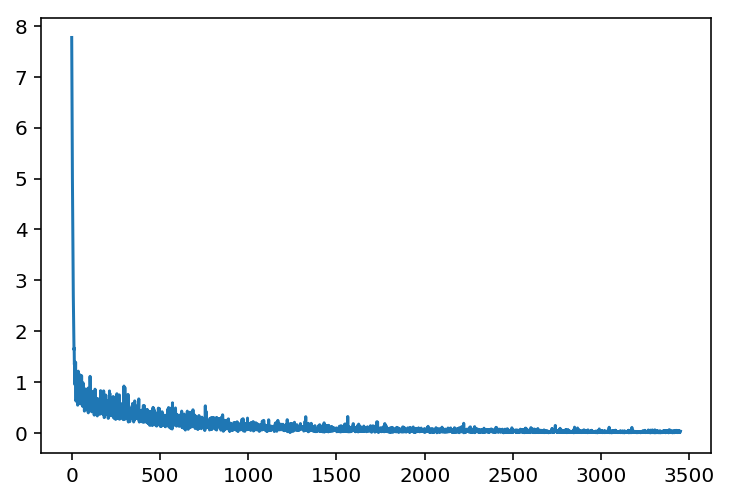

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_track)

In [26]:
from preprocess import *
def compose(lyrics):
    lyrics_list, mask = prepare_prediction(lyrics, batch_size, data_dict)
    batch_, batch_length_ = produce_batch(lyrics_list)


    pred_ = sess.run([preds],
        feed_dict={
            _encoder_inputs: batch_.T,
            _encoder_seq_len: batch_length_,
            _is_training:False,
            _target_notes:np.ones((batch_size,target_dict.max_length+2))
        })
    pred = np.argmax(pred_[0], axis=2)
    pred = [target_dict.reverse_transform(i) for i in pred]
    return pred, mask
    
lyrics = ["sad","happy","i whine like a baby","i want to love, laugh and smile"]

pred, mask = compose(lyrics)
for e, p in enumerate(pred):
    if e < batch_size-mask:
        print(lyrics[e])
        fname = f"sample_{lyrics[e]}"
        notes_to_midi(p, fname)
        play_midi(f"output/{fname}.mid")

sad


happy


i whine like a baby


i want to love, laugh and smile


In [56]:
play_midi("test_midi/Belive.mid")